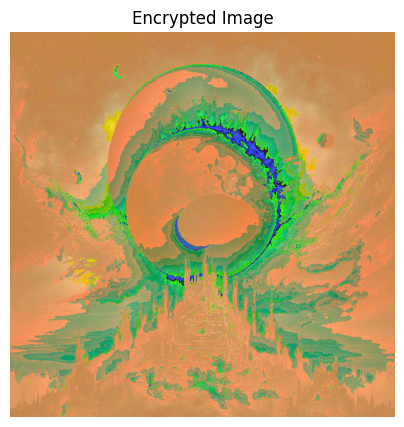

Error: The decryption key is incorrect! Please try again.


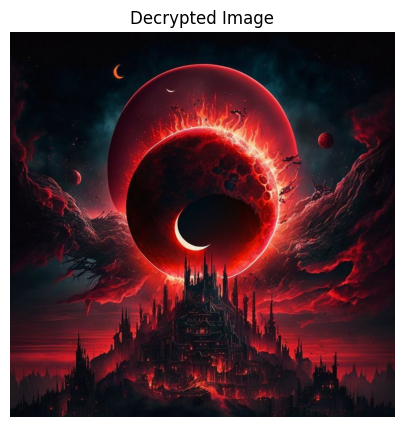

Here is the real image you are looking for.


In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def encrypt_image(input_path, key):
    img = Image.open(input_path)
    pixels = img.load()

    width, height = img.size
    key_r, key_g, key_b = key, key * 2, key * 3  # Different keys for each color channel

    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]

            # Encrypting each pixel by applying a bitwise XOR and adding the key value
            encrypted_pixel = (
                (r ^ key_r) % 256,
                (g ^ key_g) % 256,
                (b ^ key_b) % 256
            )

            pixels[i, j] = encrypted_pixel

    return img

def decrypt_image(encrypted_img, key):
    pixels = encrypted_img.load()

    width, height = encrypted_img.size
    key_r, key_g, key_b = key, key * 2, key * 3  # Same keys used for decryption

    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]

            # Decrypting each pixel by applying a bitwise XOR and subtracting the key value
            decrypted_pixel = (
                (r ^ key_r) % 256,
                (g ^ key_g) % 256,
                (b ^ key_b) % 256
            )

            pixels[i, j] = decrypted_pixel

    return encrypted_img

# Image paths
input_image_path = "C:\\Users\\prati\\Downloads\\Aesthetic Art.jpg"

# User input for encryption key
encryption_key = int(input("Enter the encryption key (an integer): "))

# Encrypt the image
encrypted_img = encrypt_image(input_image_path, encryption_key)

# Display encrypted image
plt.figure(figsize=(5, 5))
plt.imshow(encrypted_img)
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

# Ask for decryption key until the correct one is entered
while True:
    decryption_key = int(input("Enter the decryption key (an integer): "))
    if decryption_key == encryption_key:
        decrypted_img = decrypt_image(encrypted_img.copy(), decryption_key)
        
        # Display decrypted image
        plt.figure(figsize=(5, 5))
        plt.imshow(decrypted_img)
        plt.title("Decrypted Image")
        plt.axis('off')
        plt.show()
        
        print("Here is the real image you are looking for.")
        break
    else:
        print("Error: The decryption key is incorrect! Please try again.")
